In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Circle
import numpy as np
from matplotlib import pyplot as plt


#end elements are added to stabilize the baseline 
Xt = np.arange(-1-0.025,1.05,0.05)
Yt = np.arange(-1-0.025,1.05,0.05)

Xt0 = np.arange(-1+0.025,1.,0.05)
Yt0 = np.arange(-1+0.025,1.,0.05)
XX, YY = np.meshgrid(Xt0,Yt0)

def histplot(H, filename=None):
    fig = plt.figure(figsize=(6, 6))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
    main_ax = fig.add_subplot(grid[:-1, 1:])
    divider = make_axes_locatable(main_ax)

    y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], yticklabels=[], sharey=main_ax)
    x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], xticklabels=[], sharex=main_ax)
    main_ax.set_xlim((-1, 1))
    main_ax.set_ylim((-1, 1))

    Hticks = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0,2.0,4.0,8.0,16.0]
    CS = main_ax.contourf(XX,YY,H.T, Hticks, cmap='BuPu', vmin=0, vmax=2)
    #fig.colorbar(CS, ticks=v, shrink=0.8, ax=main_ax)
    CS = main_ax.contour(XX,YY,H.T, Hticks, colors='k', vmin=0, vmax=2, linewidths=0.25)
    main_ax.clabel(CS, fontsize='x-large', fmt='%1.1f')
    # main_ax.gca().set_aspect('equal')
    main_ax.axhline(0, color='gray')
    main_ax.axvline(0, color='gray')
    main_ax.add_patch(plt.Circle((0,0),radius=1, fill=None, color='gray'))
    main_ax.spines['top'].set_visible(False)
    main_ax.spines['right'].set_visible(False)
    main_ax.spines['bottom'].set_visible(False)
    main_ax.spines['left'].set_visible(False)

    
    xhist = list(np.sum(H,axis=1))
    yhist = list(np.sum(H,axis=0))
    xhist = [0.] + xhist + [0.]
    yhist = [0.] + yhist + [0.]


    x_hist.fill(Xt,xhist, "#C6DCEC")
    x_hist.plot(Xt,xhist)
    x_hist.invert_yaxis()
    x_hist.set_xticks([], [])
    x_hist.set_yticks([], [])
    x_hist.spines['top'].set_visible(False)
    x_hist.spines['right'].set_visible(False)
    x_hist.spines['bottom'].set_visible(False)
    x_hist.spines['left'].set_visible(False)
    
    y_hist.fill(yhist,Yt, "#C6DCEC")
    y_hist.plot(yhist,Yt)
    y_hist.invert_xaxis()
    y_hist.set_xticks([], [])
    y_hist.set_yticks([], [])
    y_hist.spines['top'].set_visible(False)
    y_hist.spines['right'].set_visible(False)
    y_hist.spines['bottom'].set_visible(False)
    y_hist.spines['left'].set_visible(False)

    x_hist.set_xlim((-1, 1))
    y_hist.set_ylim((-1, 1))


    if filename is not None:
        plt.savefig(filename)
    plt.show()



Plot the histograms.

(40, 40)


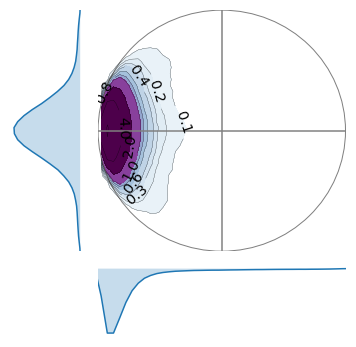

(40, 40)


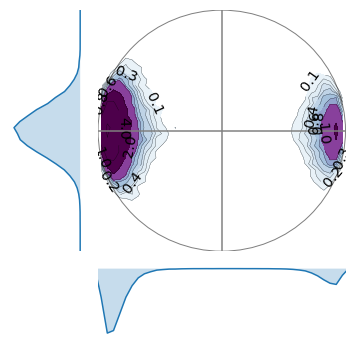

(40, 40)


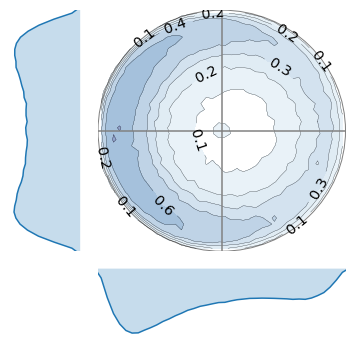

(40, 40)


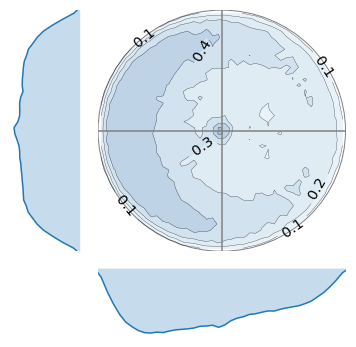

(40, 40)


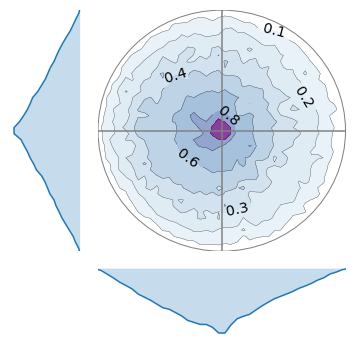

(40, 40)


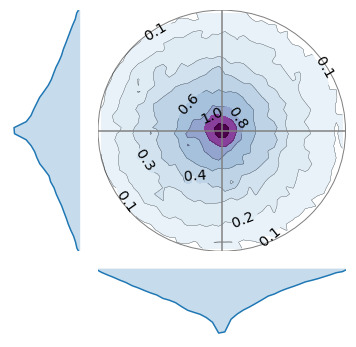

In [16]:
class Hist:
    def __init__(self, source="", pdf=""):
        self.source = source
        self.pdf    = pdf

hists = [Hist(source="4P2KIh250K.twhist", pdf="1h.pdf"),
         Hist(source="4P2KIc250K.twhist", pdf="1c.pdf"),
         Hist(source="4P2K190K.twhist", pdf="190K.pdf"),
         Hist(source="4P2K220K.twhist", pdf="220K.pdf"),
         Hist(source="4P2K250K.twhist", pdf="250K.pdf"),
         Hist(source="4P2K280K.twhist", pdf="280K.pdf")]

for hist in hists:
    H = np.loadtxt(hist.source)
    print(H.shape)
    histplot(np.loadtxt(hist.source))
    # histplot(np.loadtxt(hist.source, "r"), hist.pdf)


Histogram of CRN. (Use genice)

In [17]:
import numpy as np
import os

def valueloader(file):
    """
    Read twists in @BTWC format analysed with analice command.
    """
    vals = []
    for line in file.readlines():
        if line[0] == "#":
            continue
        cols = line.split()
        if len(cols) == 7 and cols[0][0] != '-' and -1 == line.find("@") and cols[6] != "0.0000":
            vals.append([float(x) for x in cols[2:7]])
            #seven columns of @BTWC are:
            # 1,2 : water labels
            # 3,4,5: x,y,z; center of the bond
            # 6,7: real, ideal twist
    return np.array(vals)

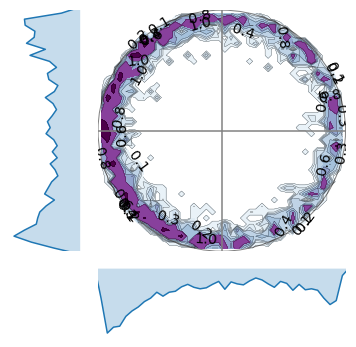

In [18]:
vals = valueloader(os.popen("genice CRN1 -f bondtwist"))
chirs = vals[:,3]
chiis = vals[:,4]
H = np.histogram2d(chirs, chiis, bins=(40,40), range=[[-1.,1.],[-1.,1.]], normed=True)
histplot(H[0])

----
**The following codes are for preparing figures in the paper. They are useless without the original data.**

In [ ]:
#data container. Use DataClass in Python 3.7 and later
class Phase:
    def __init__(self, twfile="", label="", source="", T=0):
        self.twfile = twfile
        self.label = label
        self.source = source
        self.T = T
        

phases = [Phase(twfile="4P2K190K.twhist",
                label="$T_m-$60 K (190 K)",
                source="cat /Volumes/workarea/work/SupercooledWater/4P2K/T-190/0000?[02468]0.btwc",
                T=190),
          Phase(twfile="4P2K220K.twhist",
                label="$T_m-$30 K (220 K)",
                source="cat /Volumes/workarea/work/SupercooledWater/4P2K/T-220/0000?[02468]0.btwc",
                T=220),
          Phase(twfile="4P2K250K.twhist",
                label="$T_m$  (250 K)",
                source="cat /Volumes/workarea/work/SupercooledWater/4P2K/T-250/Slow/00003.btwc",
                T=250),
          Phase(twfile="4P2K280K.twhist",
                label="$T_m+$30 K (280 K)",
                source="cat /Volumes/workarea/work/SupercooledWater/4P2K/T-280/Slow/00003.btwc",
                T=280),
          Phase(twfile="4P2KIc250K.twhist",
                label="1h at $T_m$ (250 K)",
                source="cat /Volumes/workarea/work/ice-water/00010-0.btwc",
                T=250),
          Phase(twfile="4P2KIh250K.twhist",
                label="1c at $T_m$ (250 K)",
                source="cat /Volumes/workarea/work//ice+vapor/4P2K/T-250/00002.btwc",
                T=250),
          ]


for phase in phases:
    vals = valueloader(os.popen(phase.source))

    zs = vals[:,2]
    chirs = vals[:,3]
    chiis = vals[:,4]
    if 'Ih' in phase.twfile:
        ra = (10<zs)&(zs<37)
        chirs = chirs[ra]
        chiis = chiis[ra]
    if 'Ic' in phase.twfile:
        ra = (16<zs)&(zs<24)
        chirs = chirs[ra]
        chiis = chiis[ra]


    H = np.histogram2d(chirs, chiis, bins=(40,40), range=[[-1.,1.],[-1.,1.]], normed=True)
    np.savetxt(phase.twfile, H[0])
